In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
Base = automap_base()

In [5]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

'2017-08-23'

In [9]:
# # Assuming most_recent is a string in the format 'YYYY-MM-DD'
# #most_recent = "2023-04-25"  # Example string, replace this with your actual query result

# # Convert the string to a date object
# most_recent_date = dt.datetime.strptime(most_recent, '%Y-%m-%d').date()

# # Now calculate the date one year ago
# one_year = most_recent_date - dt.timedelta(days=365)

# print(one_year)  # This will print the date one year before most_recent


# #dt.datetime.strptime(most_recent, '%Y-%m-%d').date() converts the string most_recent into a date object.

In [14]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
str_recent = most_recent[0]

In [17]:
#one_year = dt.date(most_recent) - dt.timedelta(days=365)
str_recent

'2017-08-23'

In [24]:
most_recent_date = dt.datetime.strptime(str_recent, '%Y-%m-%d').date()


In [54]:
one = most_recent_date - dt.timedelta(days=365)
one

datetime.date(2016, 8, 23)

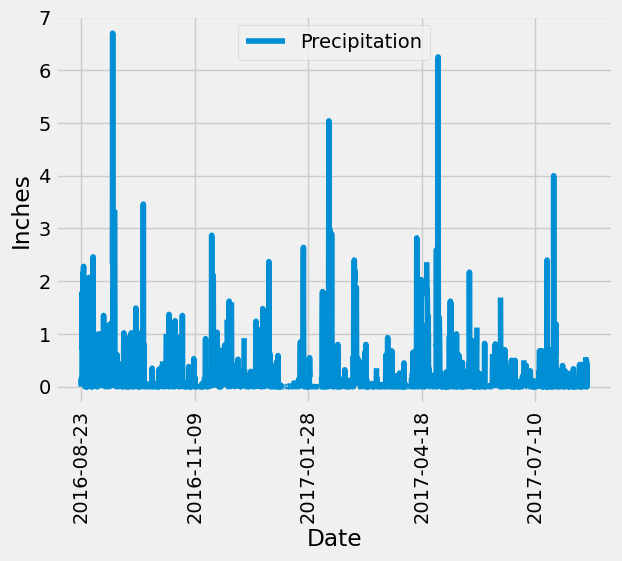

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#recent_precip = session.query(measurement.prcp).
# Calculate the date one year from the last date in data set.
most_recent_date = dt.datetime.strptime(str_recent, '%Y-%m-%d').date()


one_year = most_recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize=(10, 6))
precip_df.plot.line(x='Date', y='Precipitation')
# plt.plot(precip_df['Date'], 
#          precip_df['Precipitation'], 
#          #marker='o', 
#          linestyle='-',
#          color='b')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

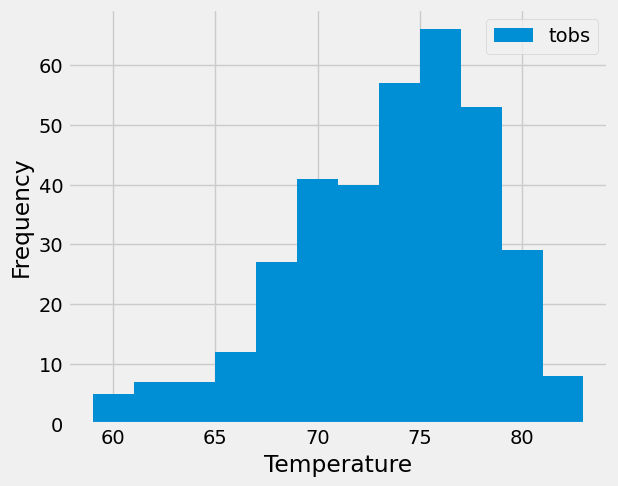

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()